# Logistic Regression

Objective: to predict whether a person on the titanic will survive or not based on the data we have

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load the data
url = "https://bit.ly/wkspdata"
df = pd.read_csv(url)
df.tail(5)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Generally, for ML models, data that is very unique is not useful (e.g. names, ticket no.)
# And then, we need to encode some of the categorical data to numerical data (e.g. sex, which is M/F)
def preprocess(df):
    # Drop useless columns
    df = df.drop(["name", "ticket", "cabin"], axis=1)
    # Drop all rows which has NaN values (in some other cases we can probably do something to keep these rows)
    df = df.dropna()
    # Encode some columns to convert categorical to numerical values
    categorical_features = ["embarked", "sex"]
    # use get_dummies ( a form of one-hot encoding)
    df = pd.get_dummies(df, columns=categorical_features) # the other option is label encoding
    return df

In [7]:
df = preprocess(df)
df.head(10)

,survived,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1
6,0,1,54.0,0,0,51.8625,0,0,1,0,1
7,0,3,2.0,3,1,21.0750,0,0,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1,1,0
9,1,2,14.0,1,0,30.0708,1,0,0,1,0
10,1,3,4.0,1,1,16.7000,0,0,1,1,0


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
# 1) Separating the data into X and y
X = df.iloc[:,1:].values # "1:" means from Column 1 all the way to the end
y = df.iloc[:,0].values # 0th is the survived column

In [10]:
# 2) Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# Train the model
log_reg = LogisticRegression(max_iter=1000) # default max_iter is 100, which can be insufficient!
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
# Testing and Evaluation
y_pred = log_reg.predict(X_test) # X_test is the 20% test data


In [13]:
# Import Metric Libraries
from sklearn import metrics

In [16]:
# Metric 1: Accuracy
test_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", test_acc)

Accuracy:  0.8391608391608392


Text(33.0, 0.5, 'Predicted')

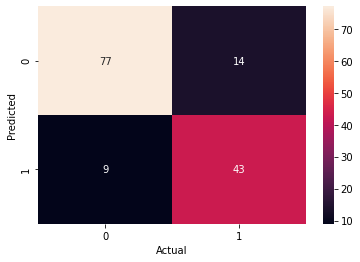

In [17]:
# Metric 2: Confusion Matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
import seaborn as sns
sns.heatmap(conf_mat.T, annot=True) # .T means .transpose; without transpose the x- and y- label will be flipped :)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [19]:
# Metric 3: Precision and Recall
test_prec = metrics.precision_score(y_test, y_pred) # Precision = True Positive / (True Positive + False Positive)
print("Precision: ", test_prec)
test_rec = metrics.recall_score(y_test, y_pred) # Recall = True Positive / (True Positive + False Negative)
print("Recall: ", test_rec)


Precision:  0.8269230769230769
Recall:  0.7543859649122807


## Homework:

Use the Logistic Regression Model on the IRIS dataset and predict the type of flower
- Figure out how to get the target/output
- Use Logistic Regression to predict it